In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

import pickle

In [3]:
df = pd.read_csv('GlucMon_PriceIncr.csv')

In [4]:
df.head(5)

,YR-MON,Silver,Silver-1,Silver-2,Silver-3,Silver-4,Silver-5,Silver-6,Copper,Copper-1,...,Copper-5,Copper-6,Steel,Steel-1,Steel-2,Steel-3,Steel-4,Steel-5,Steel-6,PriceIncrDate
0,2009-Sep,0.142,0.074,-0.088,0.045,0.121,-0.046,-0.022,0.005,0.176,...,0.182,0.141,0.036,0.049,0.041,0.011,0.002,-0.061,-0.030,0
1,2009-Oct,0.052,0.142,0.074,-0.088,0.045,0.121,-0.046,0.018,0.005,...,0.032,0.182,0.012,0.036,0.049,0.041,0.011,0.002,-0.061,0
2,2009-Nov,0.034,0.052,0.142,0.074,-0.088,0.045,0.121,0.055,0.018,...,0.088,0.032,-0.024,0.012,0.036,0.049,0.041,0.011,0.002,0
3,2009-Dec,-0.008,0.034,0.052,0.142,0.074,-0.088,0.045,0.050,0.055,...,0.047,0.088,0.023,-0.024,0.012,0.036,0.049,0.041,0.011,0
4,2010-Jan,0.006,-0.008,0.034,0.052,0.142,0.074,-0.088,0.048,0.050,...,0.176,0.047,0.051,0.023,-0.024,0.012,0.036,0.049,0.041,0


In [5]:
y = df[['PriceIncrDate']]

In [6]:
X = df.drop(['YR-MON', 'PriceIncrDate'], axis=1)

In [7]:
##X.set_index('YR-MON')

In [8]:
##y.set_index('YR-MON')

In [9]:
X.shape

(139, 21)

In [10]:
y.shape

(139, 1)

In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 10% testing, 90% training

In [26]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred_train = clf.predict(X_train)
y_pred2 = clf.predict(X)

In [27]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Accuracy, how often is model correct? 
print("Accuracy - small sample test:",accuracy)

# Precision, how often does model get predict positives correctlu?
print ("Precision - small sample test:", precision)

# Recall, how often does model find all the positive labels?
print ("Recall - small sample test:", recall)

Accuracy - small sample test: 0.7142857142857143
Precision - small sample test: 0.0
Recall - small sample test: 0.0


In [28]:
accuracy2 = metrics.accuracy_score(y, y_pred2)
print("Accuracy - all data:",accuracy2)

recall2 = metrics.recall_score(y, y_pred2)
print ("Precision - all data:", recall2)

precision2 = metrics.precision_score(y, y_pred2)
print ("Recall - all data:", recall2)

Accuracy - all data: 0.9712230215827338
Precision - all data: 0.8461538461538461
Recall - all data: 0.8461538461538461


In [29]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Copper-4    0.072322
Copper-3    0.061308
Copper-5    0.060928
Silver-2    0.056783
Steel       0.056436
Copper-2    0.055574
Silver-1    0.054181
Silver-4    0.050531
Silver      0.050275
Silver-3    0.048421
Steel-4     0.048410
Copper      0.043926
Steel-6     0.042895
Steel-1     0.041838
Steel-5     0.041506
Copper-6    0.038644
Silver-6    0.038542
Silver-5    0.038365
Steel-3     0.038043
Copper-1    0.030813
Steel-2     0.030260
dtype: float64

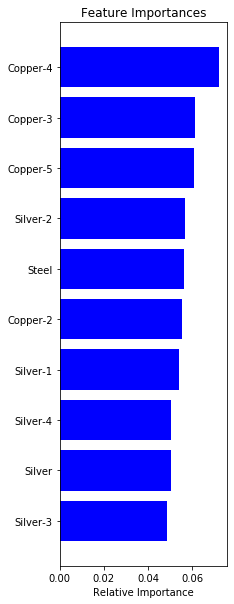

In [30]:
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(3,10))
plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
## create a predictions dataframe copying indices from X_test then merge with the original data.

y_pred_df = pd.DataFrame(data = y_pred, columns = ['PriceIncrDate'], index = X_test.index.copy())
df_out = pd.merge(df, y_pred_df, how = 'left', left_index = True, right_index = True)

In [32]:
## create a predictions dataframe copying indices from X_test then merge with the original data (entire dataset)

y_pred2_df = pd.DataFrame(data = y_pred2, columns = ['PriceIncrDate'], index = X.index.copy())
df_out2 = pd.merge(df, y_pred2_df, how = 'left', left_index = True, right_index = True)

In [33]:
df_out2 .rename(columns={'PriceIncrDate_x':'PriceIncrDate', 'PriceIncrDate_y':'PriceIncrDate_pred'}, inplace=True)

In [34]:
df_out2[df_out2['PriceIncrDate'] == 1][['YR-MON', 'PriceIncrDate', 'PriceIncrDate_pred']]

,YR-MON,PriceIncrDate,PriceIncrDate_pred
34,2012-Jul,1,1
35,2012-Aug,1,1
42,2013-Mar,1,1
43,2013-Apr,1,0
44,2013-May,1,1
45,2013-Jun,1,1
46,2013-Jul,1,1
52,2014-Jan,1,1
53,2014-Feb,1,1
56,2014-May,1,1
